In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from tqdm import tqdm
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from skimage import io

In [2]:
from cassava.transforms import get_train_transforms, get_test_transforms
from cassava.utils import *

In [3]:
%matplotlib inline

In [8]:
parameters = context.catalog.load('parameters')

2020-12-28 14:49:50,116 - kedro.io.data_catalog - INFO - Loading data from `parameters` (MemoryDataSet)...


In [4]:
train = context.catalog.load('train')

2020-12-28 14:49:36,489 - kedro.io.data_catalog - INFO - Loading data from `train` (ImageOneFolderDataSet)...


In [15]:
raw_transforms = A.Compose([
        A.ToFloat(max_value=1.0),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
])

def get_raw_transform(img):
    return raw_transforms(image=np.array(img))['image']

In [9]:
aug_transforms = get_train_transforms(parameters['classifier']['train_width'], parameters['classifier']['train_height'])
aug_transforms

<function cassava.transforms.get_wrapper.<locals>.wraps(img)>

In [55]:
test_transforms = get_test_transforms(400, 400)
test_transforms

<function cassava.transforms.get_wrapper.<locals>.wraps(img)>

In [56]:
raw_dataset = DatasetFromSubset(torch.utils.data.Subset(train, indices=list(range(len(train)))), transform=get_raw_transform)
augmented_dataset = DatasetFromSubset(torch.utils.data.Subset(train, indices=list(range(len(train)))), transform=aug_transforms)
test_aug_dataset = DatasetFromSubset(torch.utils.data.Subset(train, indices=list(range(len(train)))), transform=test_transforms)

In [57]:
unnorm = Unnormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [63]:
idx = np.random.choice(range(len(train)))
source = train.sources[idx]
source

'train_2020'

3 train_2020


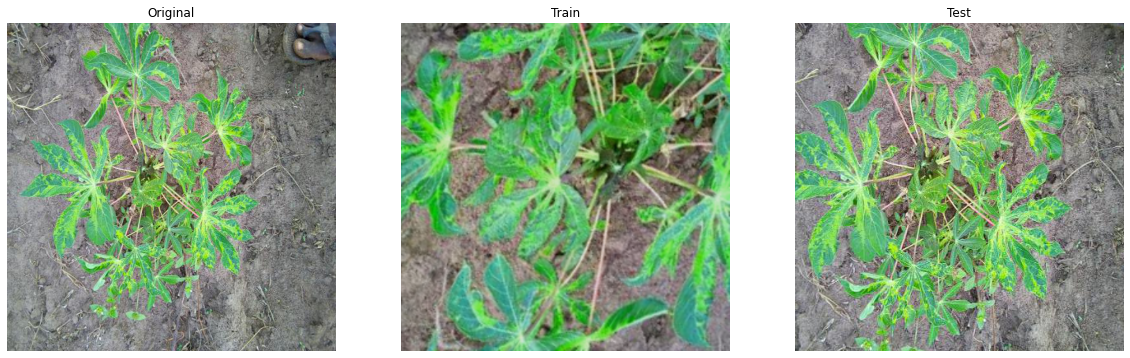

In [64]:
raw_image, label = raw_dataset[idx]
aug_image, _ = augmented_dataset[idx]
test_aug_image, _ = test_aug_dataset[idx]

print(label, source)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plot_image(unnorm(raw_image))
plt.title('Original')
plt.subplot(1, 3, 2)
plot_image(unnorm(aug_image))
plt.title('Train')
plt.subplot(1, 3, 3)
plot_image(unnorm(test_aug_image))
plt.title('Test')
plt.show()

In [28]:
raw_image.shape

torch.Size([3, 512, 512])

In [29]:
raw_image.shape

torch.Size([3, 512, 512])

In [30]:
aug_image.shape, test_aug_image.shape

(torch.Size([3, 400, 400]), torch.Size([3, 512, 512]))